## Dataset -
##### https://drive.google.com/drive/folders/1rzEFpraXXLLIGPo6F6jNEpeMOdWMgOzN?usp=sharing

## Importing the Libraries

In [3]:
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os

## Importing Dataset and Preprocessing

In [4]:
base_dir = 'flowers/'
img_size = 224
batch = 64

## Image Data Generator

In [5]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

# Create datasets
train_datagen = train_datagen.flow_from_directory(base_dir, target_size=( img_size, img_size), subset='training', batch_size=batch)
test_datagen = test_datagen.flow_from_directory(base_dir, target_size=( img_size, img_size), subset='validation', batch_size=batch)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


## Model Development

In [6]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))

c:\Users\bhara\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,541,253 (24.95 MB)

 Trainable params: 6,541,253 (24.95 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
import keras
keras.utils.plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True
)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


#### Compiling

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])


#### Fitting

In [10]:
epochs=30
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)

c:\Users\bhara\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accuracy: 0.3454 - loss: 1.5114

c:\Users\bhara\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 42s 742ms/step - accuracy: 0.3466 - loss: 1.5087 - val_accuracy: 0.4512 - val_loss: 1.1955
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 734ms/step - accuracy: 0.5294 - loss: 1.1198 - val_accuracy: 0.5698 - val_loss: 1.0609
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 737ms/step - accuracy: 0.6212 - loss: 0.9899 - val_accuracy: 0.6000 - val_loss: 1.0395
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 737ms/step - accuracy: 0.6427 - loss: 0.9106 - val_accuracy: 0.5756 - val_loss: 1.1003
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 738ms/step - accuracy: 0.6457 - loss: 0.9119 - val_accuracy: 0.5733 - val_loss: 1.0945
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 40s 732ms/step - accuracy: 0.6206 - loss: 0.9691 - val_accuracy: 0.6547 - val_loss: 0.9109
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 740ms/step - accuracy: 0.7028 - loss: 0.7557 - val_accuracy: 0.6756 - val_loss: 0.8718
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 733ms/step - accuracy: 0.7308 - loss: 0.7107 - val_accuracy: 0.689

#### Saving and Loading model

In [11]:
from tensorflow.keras.models import load_model
model.save('Model.h5')
 
# load model
savedModel=load_model('Model.h5')

## Model Evaluation and Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0. 0. 0. 1. 0.]]
sunflower


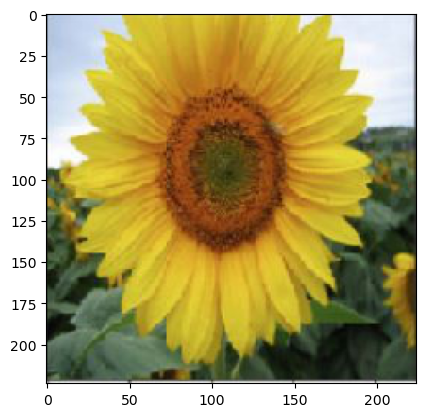

In [13]:
from keras.preprocessing import image

#Creating list for mapping
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip']

#Input image
test_image = image.load_img('img.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
    print(list_[i])
    break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0. 0. 1. 0. 0.]]
Rose


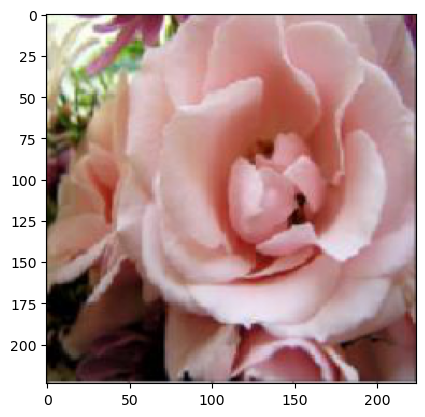

In [14]:
#Input image
test_image = image.load_img('img2.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
    print(list_[i])
    break